<a href="https://colab.research.google.com/github/tomiambro/covid_transfer_learning/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
!pip install --upgrade git+https://github.com/fastai/fastai.git
!pip install pip install nbdev &> 2

  Cloning https://github.com/fastai/fastai.git to /tmp/pip-req-build-hgbrntcv
  Running command git clone -q https://github.com/fastai/fastai.git /tmp/pip-req-build-hgbrntcv


In [2]:
from fastai.vision.all import *

In [3]:
from google.colab import drive

drive._mount('/content/gdrive')
root_path = 'gdrive/MyDrive/machine_learning/datasets/covid_dataset'  #change dir to your project folder

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
!ls {root_path}/COVID

'Covid (1000).png'  'Covid (155).png'  'Covid (437).png'  'Covid (719).png'
'Covid (1001).png'  'Covid (156).png'  'Covid (438).png'  'Covid (71).png'
'Covid (1002).png'  'Covid (157).png'  'Covid (439).png'  'Covid (720).png'
'Covid (1003).png'  'Covid (158).png'  'Covid (43).png'   'Covid (721).png'
'Covid (1004).png'  'Covid (159).png'  'Covid (440).png'  'Covid (722).png'
'Covid (1005).png'  'Covid (15).png'   'Covid (441).png'  'Covid (723).png'
'Covid (1006).png'  'Covid (160).png'  'Covid (442).png'  'Covid (724).png'
'Covid (1007).png'  'Covid (161).png'  'Covid (443).png'  'Covid (725).png'
'Covid (1008).png'  'Covid (162).png'  'Covid (444).png'  'Covid (726).png'
'Covid (1009).png'  'Covid (163).png'  'Covid (445).png'  'Covid (727).png'
'Covid (100).png'   'Covid (164).png'  'Covid (446).png'  'Covid (728).png'
'Covid (1010).png'  'Covid (165).png'  'Covid (447).png'  'Covid (729).png'
'Covid (1011).png'  'Covid (166).png'  'Covid (448).png'  'Covid (72).png'
'Covid (1012).

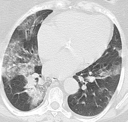

In [5]:
im = Image.open(f"{root_path}/COVID/Covid (1000).png")
im.to_thumb(128,128)

Create array with Path objects to imgs

In [6]:
path = Path(f"{root_path}")
fns = get_image_files(path)
fns

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [7]:
imgs = get_image_files(f"{root_path}")
imgs

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [22]:
covid = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(350,350))

covid

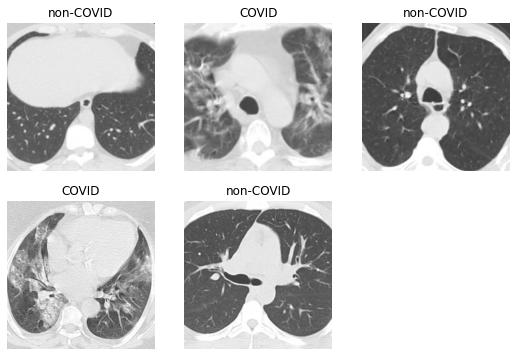

In [23]:
dls = covid.dataloaders(path)
dls.valid.show_batch(max_n=5)

In [10]:
covid = covid.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = covid.dataloaders(path)

In [10]:
learn = cnn_learner(dls, resnet18, metrics=FBeta(2))

SuggestedLRs(valley=0.0007079457864165306)

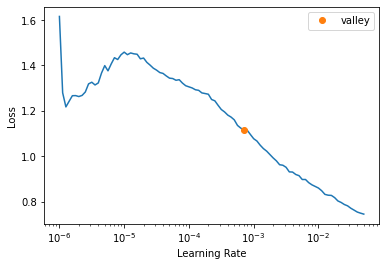

In [11]:
learn.lr_find(start_lr=1e-6, end_lr=0.1)

In [12]:
lr = 1e-3
learn.fine_tune(6, lr)

epoch,train_loss,valid_loss,fbeta_score,time
0,0.627090,1.248673,0.882140,00:39


epoch,train_loss,valid_loss,fbeta_score,time
0,0.282146,0.221090,0.873984,00:48
1,0.196700,0.544433,0.722128,00:46
2,0.140904,0.136200,0.966981,00:47
3,0.091077,0.258924,0.859247,00:47
4,0.056005,0.054134,0.977742,00:46
5,0.034464,0.051157,0.980937,00:46


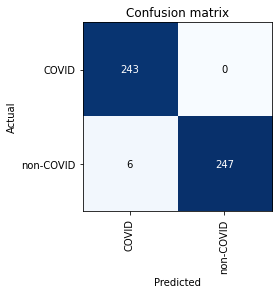

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

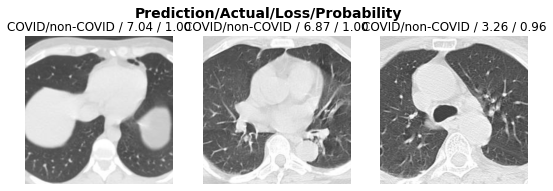

In [14]:
interp.plot_top_losses(3)

In [15]:
learn = cnn_learner(dls, resnet34, metrics=FBeta(2))

SuggestedLRs(valley=0.001258925418369472)

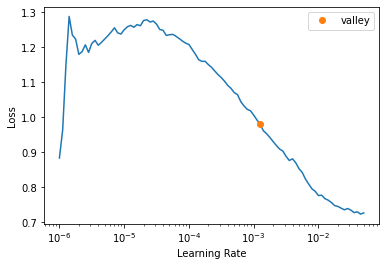

In [16]:
learn.lr_find(start_lr=1e-6, end_lr=0.1)

In [17]:
lr = 1e-3
learn.fine_tune(8, lr)

epoch,train_loss,valid_loss,fbeta_score,time
0,0.688102,0.697074,0.783373,00:54


epoch,train_loss,valid_loss,fbeta_score,time
0,0.321963,0.643555,0.607639,01:11
1,0.231547,0.241463,0.928120,01:11
2,0.195029,0.072311,0.982636,01:11
3,0.168484,0.218384,0.915663,01:11
4,0.131472,0.114774,0.946486,01:11
5,0.082578,0.063283,0.980237,01:11
6,0.050553,0.054946,0.988189,01:11
7,0.031793,0.050216,0.986582,01:11


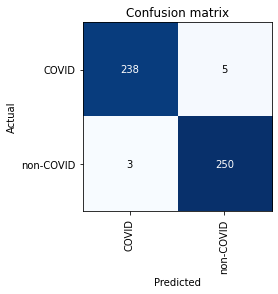

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

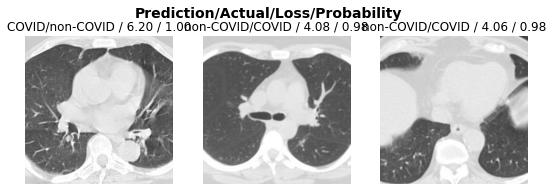

In [19]:
interp.plot_top_losses(3)